In [1]:
from carbon import CarbonSimulatorUI, __version__, __date__
print(f"Carbon Version v{__version__} ({__date__})", )
import numpy as np
from matplotlib import pyplot as plt

Carbon Version v1.5-beta0 (6/Dec/2022)


# Carbon Simulation - Demo 3-1

In this demo we look at **liquidity charts**

Set up the similation, with the pair ETHUSDC as default

In [2]:
TKNB = "ETH"
TKNQ = "USDC"

A number of other preparations here

In [3]:
max_liquidity = 100
trade_sizes = np.linspace(0,max_liquidity, 21)
trade_sizes[0] = 0.0000001
marg_trade_sizes = np.diff(trade_sizes)
trade_sizes2 = [0.5*(s1+s2) for s1,s2 in zip(trade_sizes, trade_sizes[1:])]

In [4]:
def effective_price_f(tkn, size):
    """
    returns the price at which `tkn` can be sold in `size` (None if out of liquidity)
    """
    try:
        price = Sim.amm_sells(tkn, size, execute=False)["trades"].iloc[0]["price"]
        return price
    except:
        return None

In [5]:
def run_calculation():
    """helper function: runs the calculation using global variables"""
    effective_prices = [
        effective_price_f("ETH", size) for size in trade_sizes
    ]
    token_amounts = [
        size * price for size, price in zip(trade_sizes, effective_prices)
    ]
    marg_token_amounts = np.diff(token_amounts)
    marg_prices = [
        amt / size for amt, size in zip(marg_token_amounts, marg_trade_sizes)
    ]
    return effective_prices, token_amounts, marg_token_amounts, marg_prices

In [6]:
def plot_token_amount_chart():
    """helper function: plots the chart using global variables"""
    plt.plot(trade_sizes, token_amounts, label="Token amount")
    plt.plot(trade_sizes2, marg_token_amounts, label="Marginal token amount")
    plt.title("Token amount against trade size")
    plt.xlabel(f"Trade Size ({TKNB})")
    plt.ylabel(f"Token Amount ({TKNQ})")
    plt.grid()
    plt.legend()
    return "plotted marginal and total tokens received against trade size"

In [7]:
def plot_price_chart():
    """helper function: plots the chart using global variables"""
    plt.plot(trade_sizes, effective_prices, label="Effective price")
    plt.plot(trade_sizes2, marg_prices, label="Marginal price")
    plt.title("Price against trade size")
    plt.xlabel(f"Trade Size ({TKNB})")
    plt.ylabel(f"Effective Price ({TKNB} per {TKNQ})")
    plt.grid()
    plt.legend()
    return "plotted marginal and effective price against trade size"

## Narrow range

We set up a single curve where the AMM sells ETH against USDC at between 2000-2010

In [8]:
Sim = CarbonSimulatorUI(pair=f"{TKNB}/{TKNQ}", verbose=False)
Sim.add_order("ETH", max_liquidity, 2000, 2010)["orders"]

,id,pair,tkn,y_int,y,y_unit,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,100.0,100.0,ETH,2000.0,2010.0,2000.0,USDC per ETH,0


In [9]:
effective_prices, token_amounts, marg_token_amounts, marg_prices = run_calculation()

'plotted marginal and total tokens received against trade size'

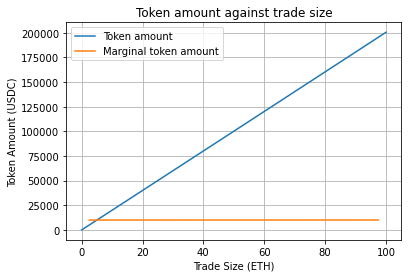

In [10]:
plot_token_amount_chart()

'plotted marginal and effective price against trade size'

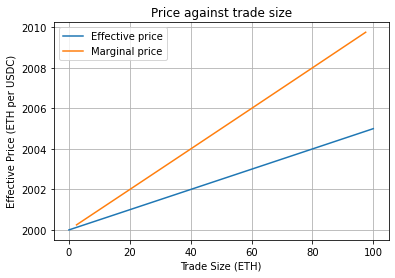

In [11]:
plot_price_chart()

In [12]:
Sim.state()["orders"]

,id,pair,tkn,y_int,y,y_unit,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,100.0,100.0,ETH,2000.0,2010.0,2000.0,USDC per ETH,0


## Wide range

In [13]:
Sim = CarbonSimulatorUI(pair=f"{TKNB}/{TKNQ}", verbose=False)
Sim.add_order("ETH", max_liquidity, 2000, 3000)["orders"]

,id,pair,tkn,y_int,y,y_unit,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,100.0,100.0,ETH,2000.0,3000.0,2000.0,USDC per ETH,0


In [14]:
effective_prices, token_amounts, marg_token_amounts, marg_prices = run_calculation()

'plotted marginal and total tokens received against trade size'

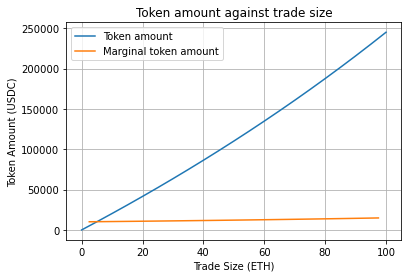

In [15]:
plot_token_amount_chart()

'plotted marginal and effective price against trade size'

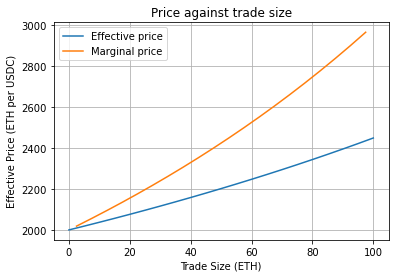

In [16]:
plot_price_chart()